In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

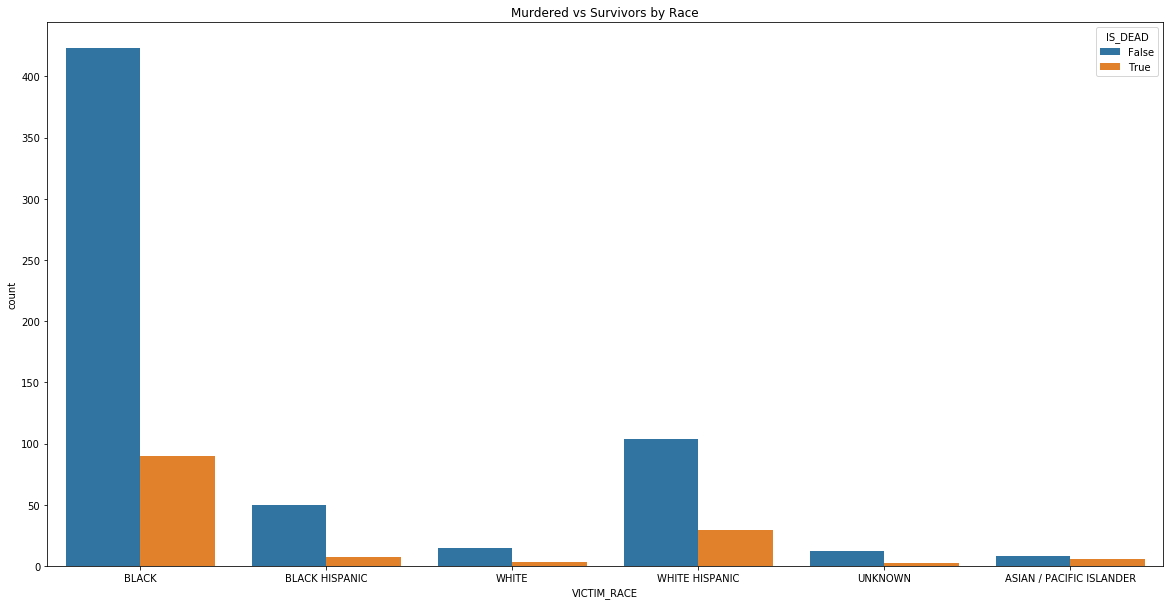

In [2]:
#NYPD_Shooting_Incident_Data
data_dir = 'C:\\IS698\\final\\'
f_encoding = 'ISO-8859-1'

Shooting_Data = 'NYPD_Shooting_Incident_Data__Year_To_Date_.csv'
NYPD_SI = pd.read_csv(data_dir + Shooting_Data,encoding = f_encoding)
#NYPD_SI.shape
#NYPD_SI.head()
plt.figure(figsize=(20,10))
plt.title("Murdered vs Survivors by Race")

NYPD_SI.rename(columns = {'STATISTICAL_MURDER_FLAG':'IS_DEAD'}, inplace = True) 
NYPD_SI.rename(columns = {'VIC_RACE':'VICTIM_RACE'}, inplace = True) 
sns.countplot(x='VICTIM_RACE', hue='IS_DEAD', data=NYPD_SI)


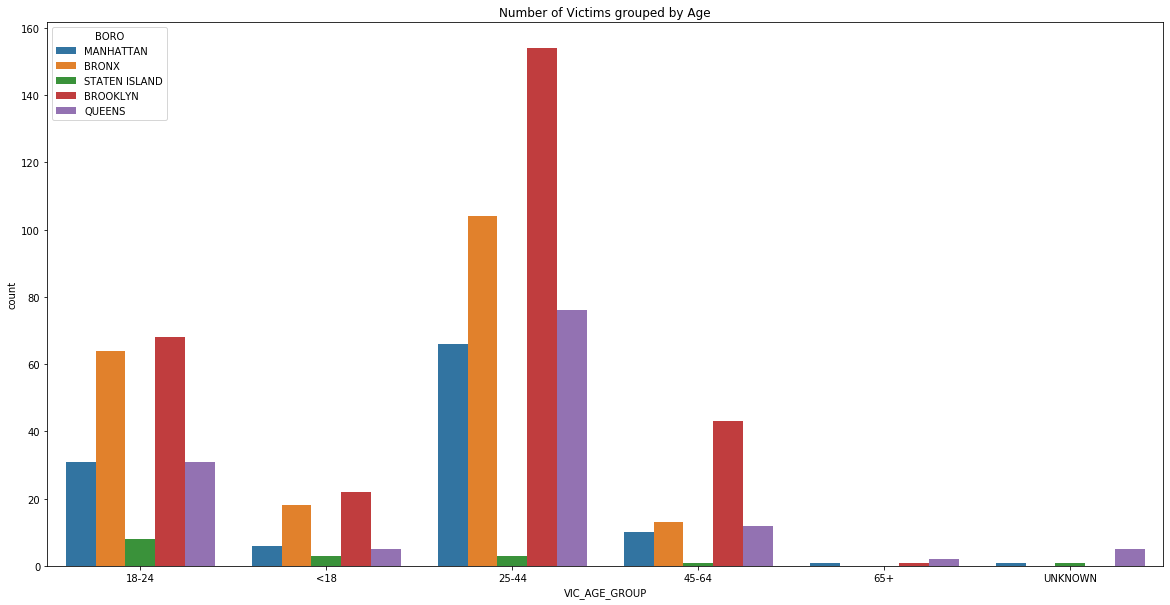

In [3]:
plt.figure(figsize=(20,10))
plt.title("Number of Victims grouped by Age")
sns.countplot(x='VIC_AGE_GROUP', hue='BORO', data=NYPD_SI)

In [4]:
data_dir = 'C:\\IS698\\final\\'
f_encoding = 'ISO-8859-1'

#Waste_Characterization
Shooting_Data = 'DSNY_Waste_Characterization__Mainsort.csv'
NYPD_WC = pd.read_csv(data_dir + Shooting_Data,encoding = f_encoding)
#NYPD_SI.shape
NYPD_WC.head()

,Material,AggregatePercent,RefusePercent,MGPPercent,PaperPercent,OrganicPercent,MaterialGroup,DSNYDiversionSummaryCategory,Location
0,Newspaper,0.019,0.011,0.005,0.098,0.000,Paper,Designated Paper,Citywide
1,Plain OCC/Kraft Paper,0.057,0.014,0.010,0.472,0.002,Paper,Designated Paper,Citywide
2,High Grade Paper,0.007,0.005,0.001,0.026,0.000,Paper,Designated Paper,Citywide
3,Mixed Low Grade Paper,0.087,0.068,0.024,0.314,0.009,Paper,Designated Paper,Citywide
4,Paper: Compostable/Soiled/Waxed OCC/Kraft,0.081,0.098,0.007,0.014,0.020,Paper,Organics Suitable for Composting,Citywide


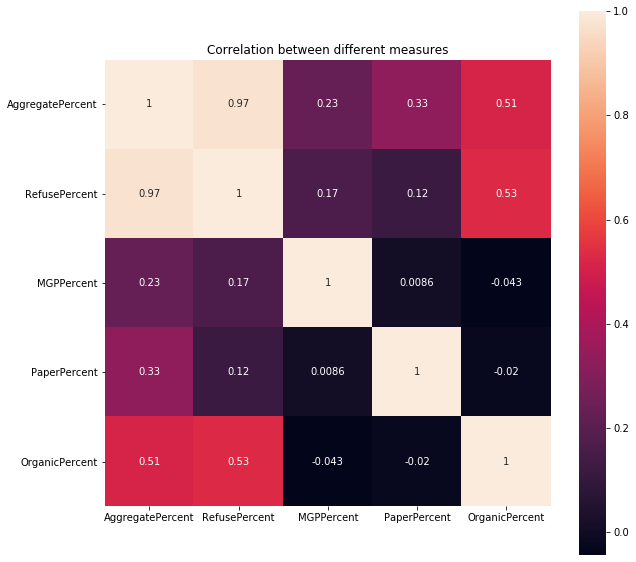

In [5]:
measure_correlations= NYPD_WC[['AggregatePercent','RefusePercent','MGPPercent','PaperPercent','OrganicPercent']].corr()
plt.figure(figsize=(10,10))
plt.title('Correlation between different measures')
sns.heatmap(measure_correlations,annot=True,square=True)

In [6]:
si_cols = list(NYPD_SI.columns)


arr1=[]
i=0

for cols in si_cols:
   arr1.append(0)
   str1  = "arr1[i] = NYPD_SI."+ cols + ".count()"
   #print(str1)
   counts = NYPD_SI.shape[0]
   exec(str1)
   
   arr1[i] /= counts
   arr1[i] *= 100
   i+=1

df1 = pd.DataFrame(arr1)

df1['COL_NM'] = si_cols
df1.rename(columns = {df1.columns[0]:'Availability_Percentage'}, inplace = True) 
df1


,Availability_Percentage,COL_NM
0,100.000000,INCIDENT_KEY
1,100.000000,OCCUR_DATE
2,100.000000,OCCUR_TIME
3,100.000000,BORO
4,100.000000,PRECINCT
5,99.866489,JURISDICTION_CODE
6,32.710280,LOCATION_DESC
7,100.000000,IS_DEAD
8,51.802403,PERP_AGE_GROUP
9,51.802403,PERP_SEX


In [7]:
wc_cols = list(NYPD_WC.columns)


arr2=[]
p=0

for cols in wc_cols:
   arr2.append(0)
   str1  = "arr2[p] = NYPD_WC."+ cols + ".count()"
   #print(str1)
   counts = NYPD_WC.shape[0]
   exec(str1)
   
   arr2[p] /= counts
   arr2[p] *= 100
   p+=1

df2 = pd.DataFrame(arr2)

df2['COL_NM'] = wc_cols
df2.rename(columns = {df2.columns[0]:'Availability_Percentage'}, inplace = True) 
df2

,Availability_Percentage,COL_NM
0,100.0,Material
1,100.0,AggregatePercent
2,100.0,RefusePercent
3,87.5,MGPPercent
4,87.5,PaperPercent
5,62.5,OrganicPercent
6,100.0,MaterialGroup
7,100.0,DSNYDiversionSummaryCategory
8,100.0,Location


In [8]:
df1

,Availability_Percentage,COL_NM
0,100.000000,INCIDENT_KEY
1,100.000000,OCCUR_DATE
2,100.000000,OCCUR_TIME
3,100.000000,BORO
4,100.000000,PRECINCT
5,99.866489,JURISDICTION_CODE
6,32.710280,LOCATION_DESC
7,100.000000,IS_DEAD
8,51.802403,PERP_AGE_GROUP
9,51.802403,PERP_SEX


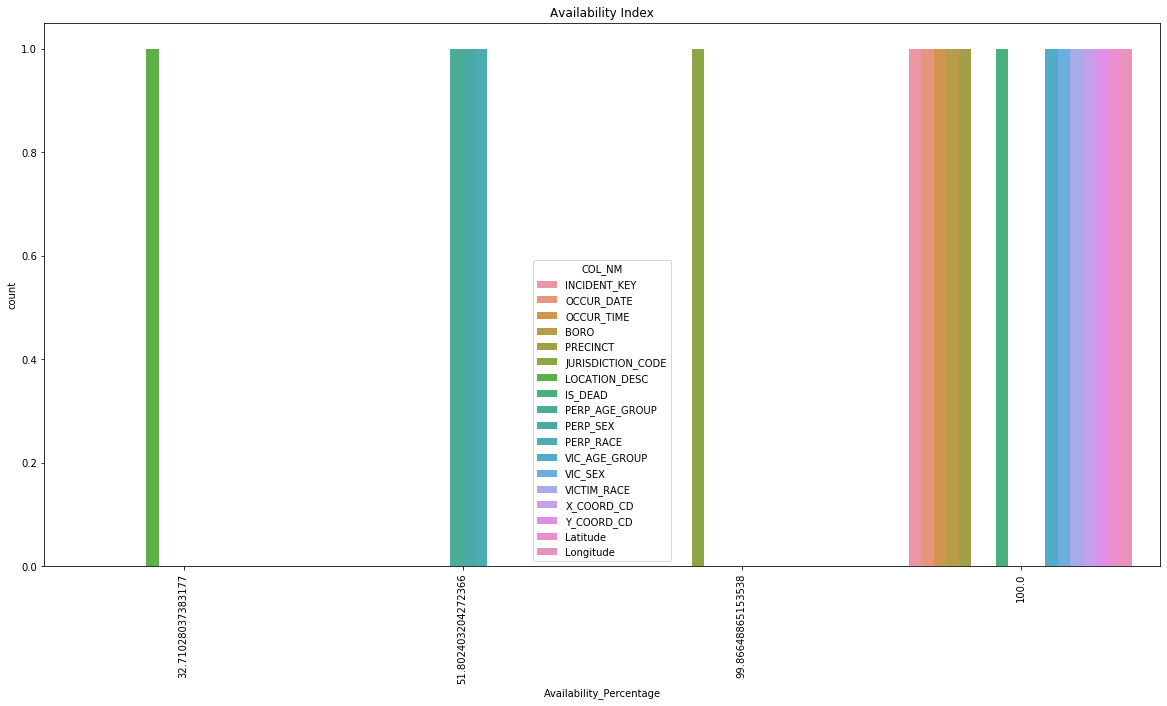

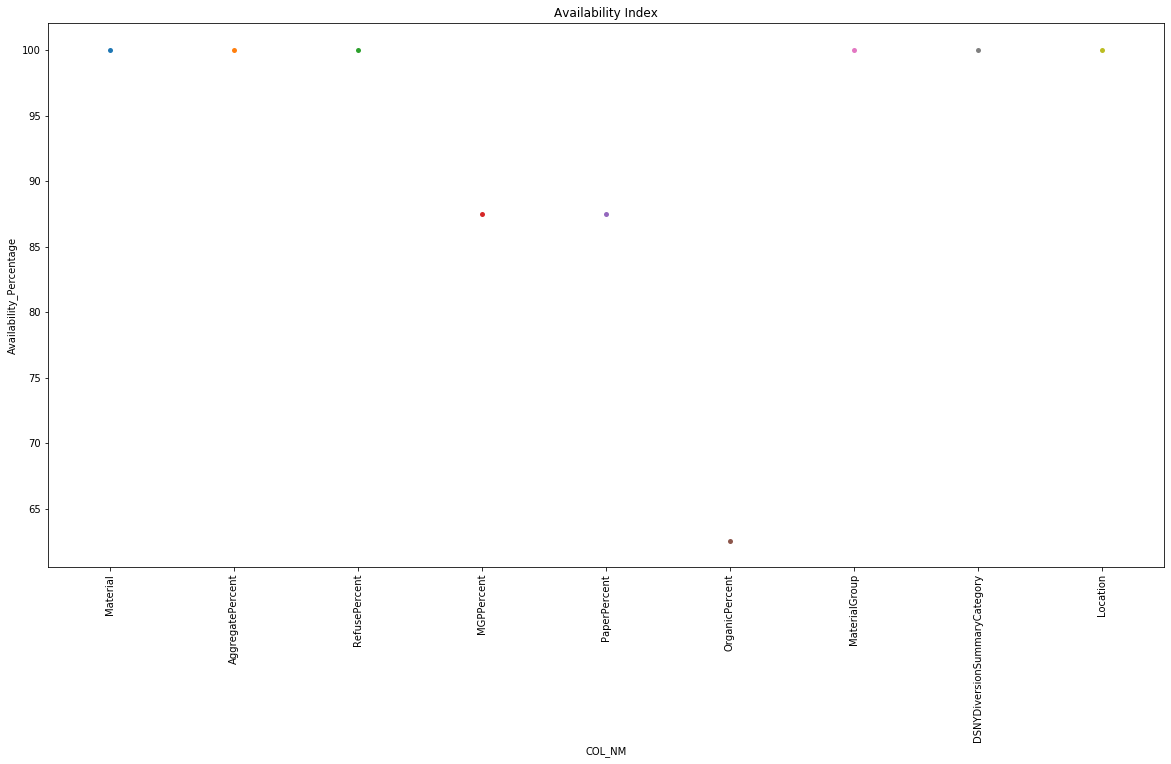

In [9]:
plt.figure(figsize=(20,10))
plt.title("Availability Index")
plt.xticks(rotation = 90)
sns.countplot(x='Availability_Percentage',hue='COL_NM' ,data=df1)
#sns.swarmplot(x='COL_NM',y='Availability_Percentage',data=df1)


plt.figure(figsize=(20,10))
plt.title("Availability Index")
plt.xticks(rotation = 90)
#sns.countplot(x='Availability_Percentage',hue='COL_NM' ,data=df1)
sns.swarmplot(x='COL_NM',y='Availability_Percentage',data=df2)

Text(0.5, 1, 'PaperPercent vs OrganicPercent')

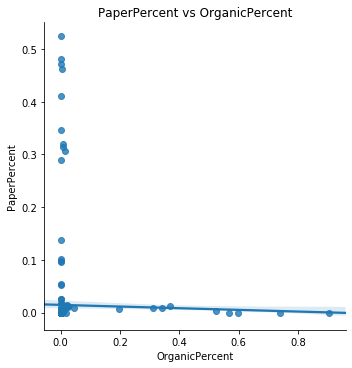

In [10]:
sns.lmplot(y='PaperPercent',x='OrganicPercent',data=NYPD_WC)
plt.title('PaperPercent vs OrganicPercent')